# Tool for manipulating tensors using the hierarchical fiber abstraction

First, include some libraries

In [1]:
# Run boilerplate code to set up environment

#%run prelude.py
%run prelude.py --no-show-animations


Prelude loaded OK
(Animation display disabled)


## Display a tensor


Following is an example of reading in a tensor and displaying it

In [2]:
        
# Display an example tensor

filename = datafileName("draw-a.yaml")

f = open(filename)
for line in f:
    print(line.rstrip('\n'))
f.close()

tensor:
  rank_ids: [ M, N, K ]
  root:
    - fiber:
        coords: [ 10, 20 ]
        payloads:
          - fiber:
              coords: [ 30, 40, 50]
              payloads:
                - fiber:
                    coords:   [ 0 ]
                    payloads: [ 1 ]
                - fiber:
                    coords:   [ 1, 2 ]
                    payloads: [ 10, 20 ]
                - fiber:
                    coords:   [ 3, 4, 5 ]
                    payloads: [ 30, 40, 50 ]
          - fiber:
              coords: [ 0, 1, 3]
              payloads:
                - fiber:
                    coords:   [ 6, 7 ]
                    payloads: [ 60, 70 ]
                - fiber:
                    coords:   [ 7, 8 ]
                    payloads: [ 70, 80 ]
                - fiber:
                    coords:   [ 9, 10 ]
                    payloads: [ 90, 100 ]


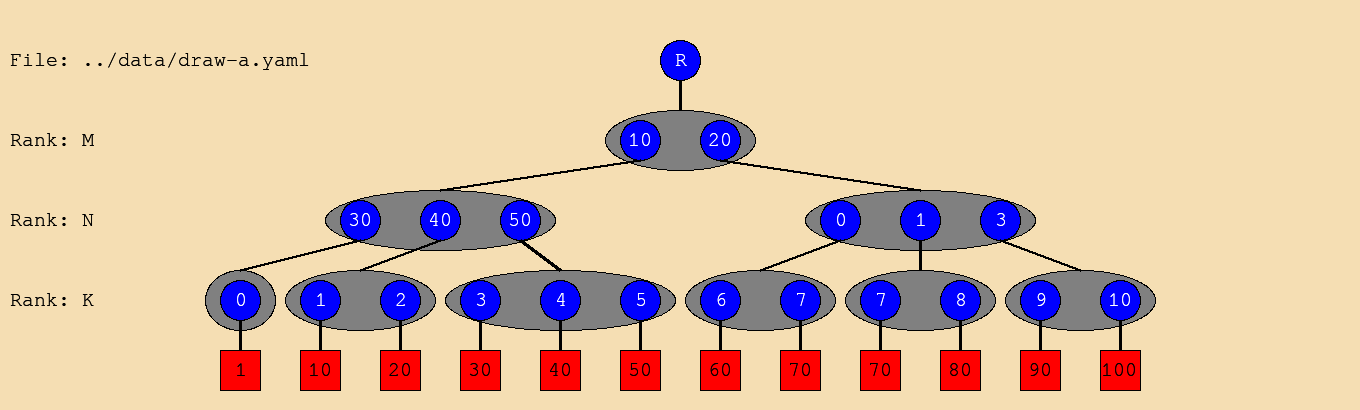

In [3]:
a = Tensor(filename)

displayTensor(a)

## Traverse a tensor

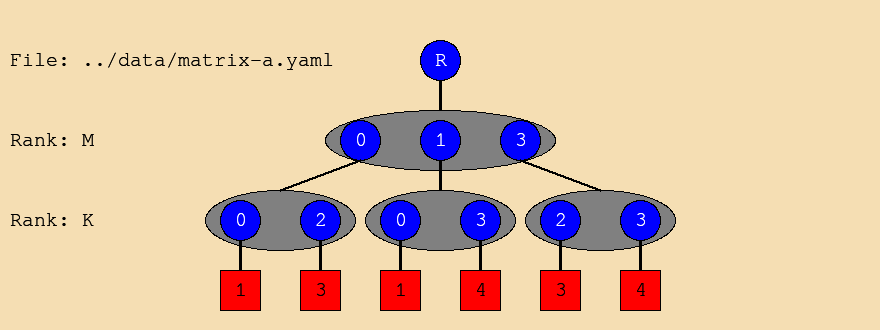

In [4]:
# Traverse a tensor

a = Tensor(datafileName("matrix-a.yaml"))

displayTensor(a)

(0, F(K)/[(0 -> <1>) (2 -> <3>) ])
Processing: (0, <1>)
Processing: (2, <3>)
(1, F(K)/[(0 -> <1>) (3 -> <4>) ])
Processing: (0, <1>)
Processing: (3, <4>)
(3, F(K)/[(2 -> <3>) (3 -> <4>) ])
Processing: (2, <3>)
Processing: (3, <4>)


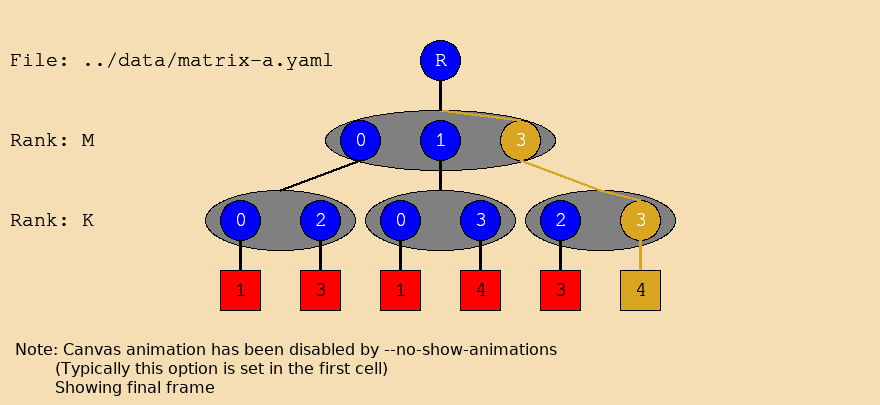

In [5]:

canvas = TensorCanvas(a)

a_m = a.getRoot()

for m, (a_k) in a_m:
    print(f"({m}, {a_k})")
    for k, (a_val) in a_k:
        print(f"Processing: ({k}, {a_val})")
        canvas.addFrame((m,k))

displayCanvas(canvas)

# Element-wise update (empty) tensor, i.e., copy

Z < A Fiber
Processing: (0, (<0>, <1>)
Processing: (2, (<0>, <3>)
Processing: (4, (<0>, <5>)
Processing: (6, (<0>, <7>)


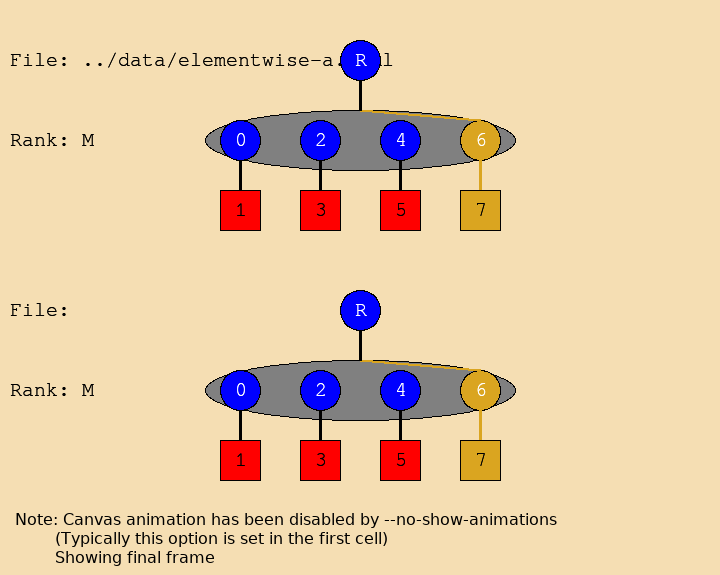

In [6]:
# Element-wise update a tensor

a = Tensor(datafileName("elementwise-a.yaml"))
z = Tensor(rank_ids=["M"])

a_m = a.getRoot()
z_m = z.getRoot()

print("Z < A Fiber")

canvas = TensorCanvas(a, z)

for m, (z_ref, a_val) in z_m << a_m:
    print(f"Processing: ({m}, ({z_ref}, {a_val})")
    
    z_ref += a_val
    canvas.addFrame([m], [m])

displayCanvas(canvas)

# Intersection

Fiber a_m & b_m


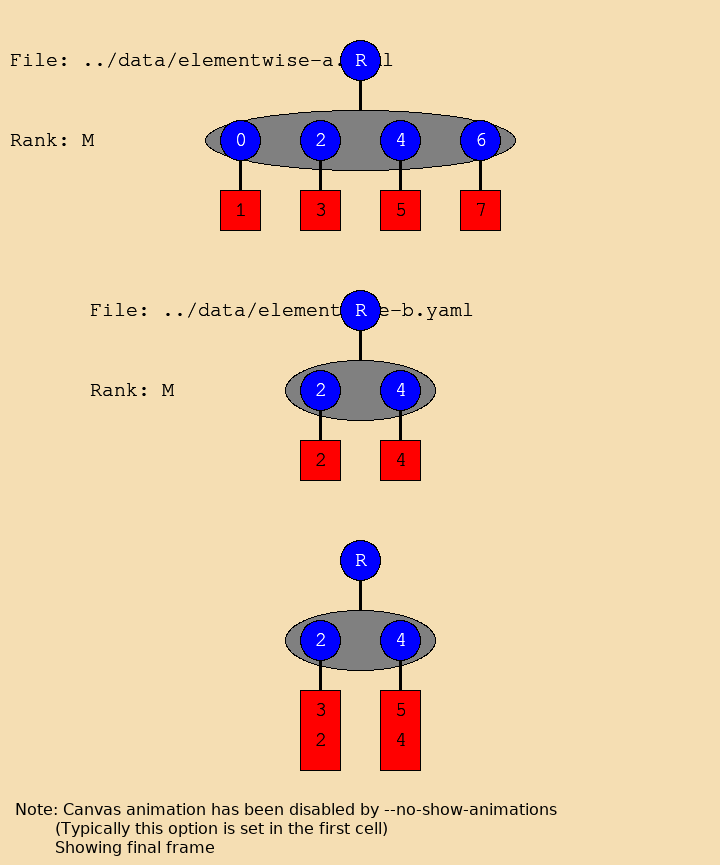

In [7]:
# Fiber instersection

a = Tensor(datafileName("elementwise-a.yaml"))
b = Tensor(datafileName("elementwise-b.yaml"))

a_m = a.getRoot()
b_m = b.getRoot()

print("Fiber a_m & b_m")

z_m = a_m & b_m

canvas = TensorCanvas(a, b, z_m)
displayCanvas(canvas, width=None)

## Element-wise multiply

Z < A Fiber
Processing: (2, (<0>, (<3>, <2>)))
Processing: (4, (<0>, (<5>, <4>)))


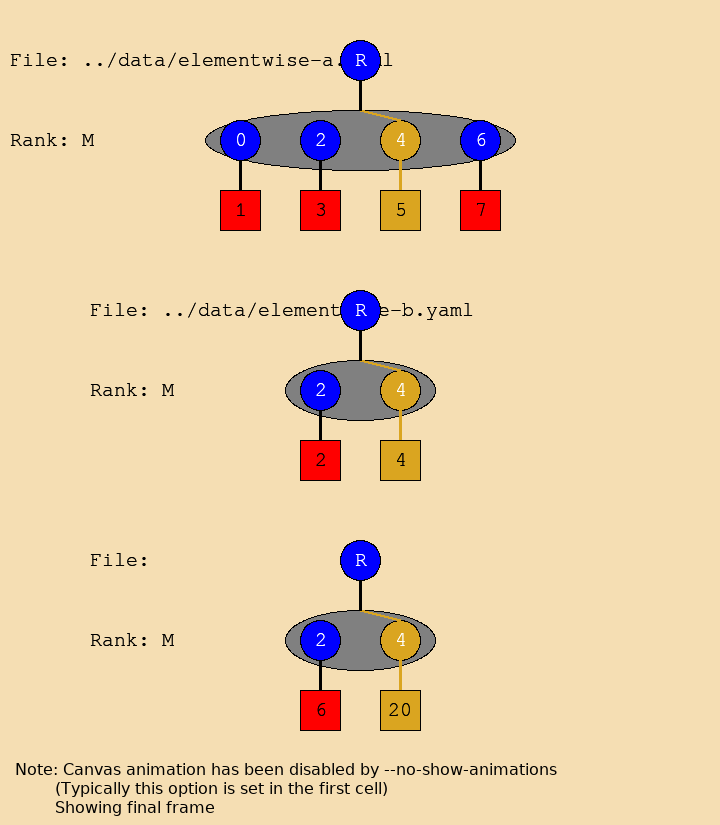

In [8]:
# Element-wise multiply

a = Tensor(datafileName("elementwise-a.yaml"))
b = Tensor(datafileName("elementwise-b.yaml"))
z = Tensor(rank_ids=["M"])

a_m = a.getRoot()
b_m = b.getRoot()
z_m = z.getRoot()

print("Z < A Fiber")

canvas = TensorCanvas(a, b, z)

for m, (z_ref, (a_val, b_val)) in z_m << (a_m & b_m):
    print(f"Processing: ({m}, ({z_ref}, ({a_val}, {b_val})))")

    z_ref += a_val * b_val
    canvas.addFrame((m,), (m,), (m,))

displayCanvas(canvas, width="75%")

## Dot-product

Here is a dot product of two tensors

Processing: [2 -> ( <0>, (<3>, <4>)]
Processing: [6 -> ( <12>, (<7>, <8>)]


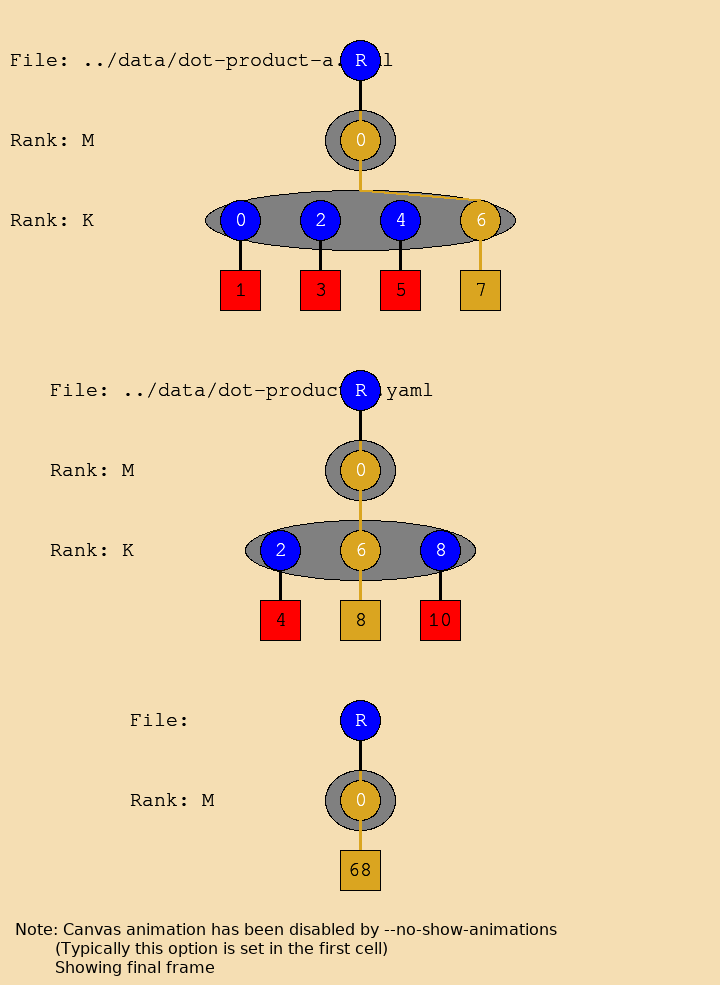

In [9]:
# Dot product
#
# To perform a dot-product we need a "row" for an output.
# So we represent the vectors as 2-D tensors
#


a = Tensor(datafileName("dot-product-a.yaml"))
b = Tensor(datafileName("dot-product-b.yaml"))
z = Tensor(rank_ids=["M"])

a_m = a.getRoot()
b_m = b.getRoot()
z_m = z.getRoot()

canvas = TensorCanvas(a, b, z)

for m, (z_ref, (a_k, b_k)) in z_m << (a_m & b_m):
    for k, (a_val, b_val) in a_k & b_k:
        print(f"Processing: [{k} -> ( {z_ref}, ({a_val}, {b_val})]")

        z_ref += a_val * b_val
        canvas.addFrame((m,k), (m, k), (m,))


displayCanvas(canvas, width="50%")

# Union

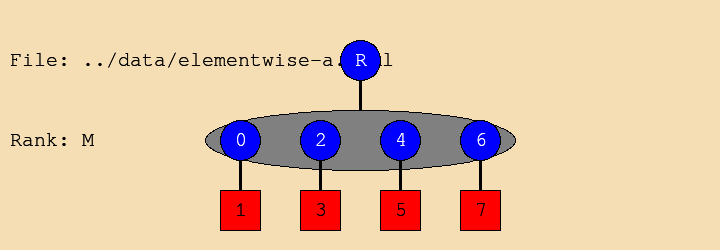

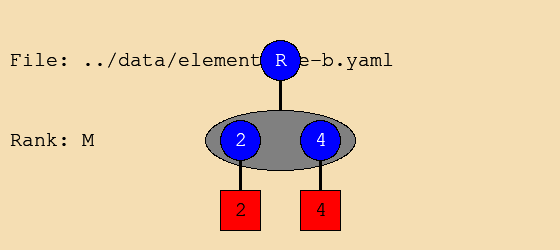

In [10]:
# Fiber union

a = Tensor(datafileName("elementwise-a.yaml"))
b = Tensor(datafileName("elementwise-b.yaml"))

displayTensor(a)
displayTensor(b)

In [11]:
a_m = a.getRoot()
b_m = b.getRoot()

print("Fiber a_m | b_m")

z_m = a_m | b_m

displayTensor(z_m)

Fiber a_m | b_m


TypeError: '>=' not supported between instances of 'str' and 'int'

## Element-wise addition

Following...



In [ ]:
#
# Do a sum of sums of the rows of two matrices
#

a = Tensor(datafileName("dot-product-a.yaml"))
b = Tensor(datafileName("dot-product-b.yaml"))

z = Tensor(rank_ids=["M"])

a_m = a.getRoot()
b_m = b.getRoot()
z_m = z.getRoot()

canvas = TensorCanvas(a, b, z)

for m, (z_ref, (mask_k, a_k, b_k)) in z_m << (a_m | b_m):
    for k, (ab_mask, a_val, b_val) in a_k | b_k:
        print(f"Processing: [{k} -> ( {z_ref}, ({ab_mask}, {a_val}, {b_val})]")

        z_ref += a_val + b_val
        canvas.addFrame((m, k), (m, k), (m,))


displayCanvas(canvas, width="250")

## Reduce vector to a rank zero tensor

In [ ]:
a = Tensor(datafileName("elementwise-a.yaml"))
z = Tensor(rank_ids=[])

a_m = a.getRoot()
z_ref = z.getRoot()

canvas = TensorCanvas(a, z)

for m_coord, (a_val) in a_m:
    z_ref += a_val
    canvas.addFrame((m_coord,), [])

displayCanvas(canvas, width=None)

## Testing area

For running alternative algorithms